In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

        week                region  interest
0 2018-03-18  workout: (Worldwide)      59.0
1 2018-03-25  workout: (Worldwide)      58.0
2 2018-04-01  workout: (Worldwide)      61.0
3 2018-04-08  workout: (Worldwide)      57.0
4 2018-04-15  workout: (Worldwide)      59.0
        week                     region  interest
0 2018-03-18  home workout: (Worldwide)      12.0
1 2018-03-18   gym workout: (Worldwide)      16.0
2 2018-03-18      home gym: (Worldwide)      10.0
3 2018-03-25  home workout: (Worldwide)      13.0
4 2018-03-25   gym workout: (Worldwide)      17.0
          country  interest
5   United States     100.0
12         Canada      86.0
18      Australia      77.0
22    New Zealand      73.0
23        Lebanon      73.0
         country                           category  interest
102         Iran  home workout: (3/16/18 - 3/16/23)        58
45       Nigeria  home workout: (3/16/18 - 3/16/23)        56
9    Philippines  home workout: (3/16/18 - 3/16/23)        52
66   Switzerla

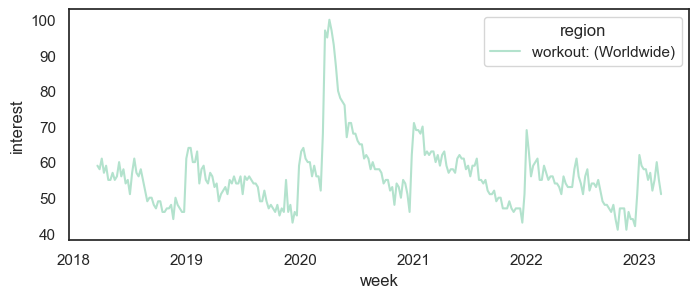

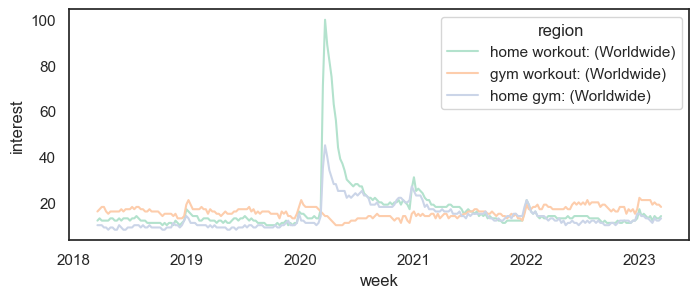

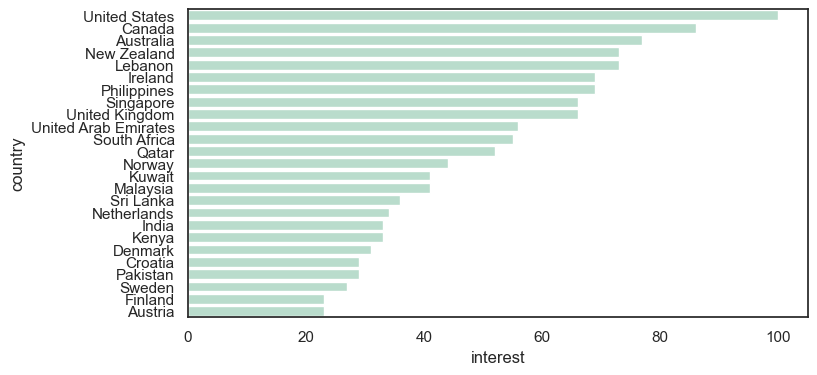

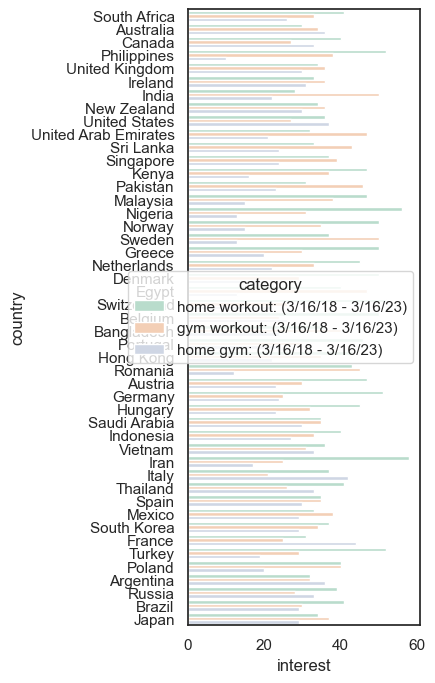

In [2]:
# Set the style for the plots
sns.set(style='white', palette='Pastel2')

# Helper function to read and plot CSV files
def read_file(filepath, plot=True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'.
    Generate a line plot using Seaborn to visualize the data.
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week', 'region', 'interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8, 3))
    df = df[df['interest'] != "<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data=df, x='week', y='interest', hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'.
    Generate a bar plot using Seaborn to visualize the data.
    Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8, 4))
        sns.barplot(data=file.dropna().iloc[:25, :], y='country', x='interest')

    if multi:
        plt.figure(figsize=(3, 8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country', 'category', 'interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y='country', x='interest', hue='category')

    file = file.sort_values(ascending=False, by='interest')
    return file

# Load the workout.csv file
workout_df = read_file("data/workout.csv")

# Display the first few rows of the DataFrame
print(workout_df.head())

# Load the three_keywords.csv file
three_keywords_df = read_file("data/three_keywords.csv")

# Display the first few rows of the DataFrame
print(three_keywords_df.head())

# Load the workout_global.csv file
workout_global_df = read_geo("data/workout_global.csv")

# Display the first few rows of the DataFrame
print(workout_global_df.head())

# Load the geo_three_keywords.csv file
geo_categories_df = read_geo("data/geo_three_keywords.csv", multi=True)

# Display the first few rows of the DataFrame
print(geo_categories_df.head())

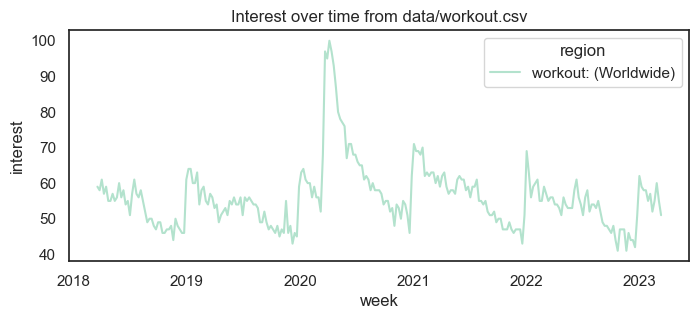

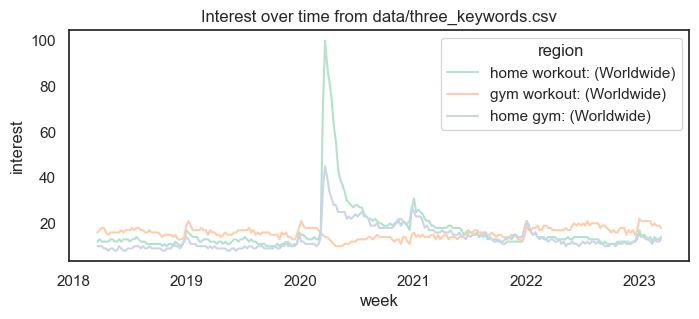

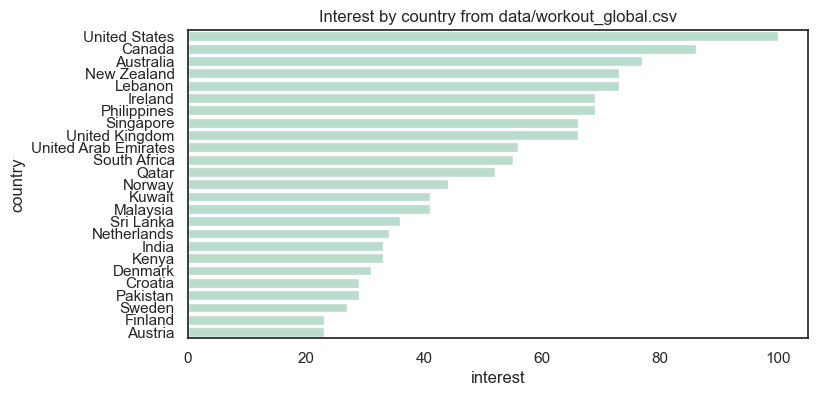

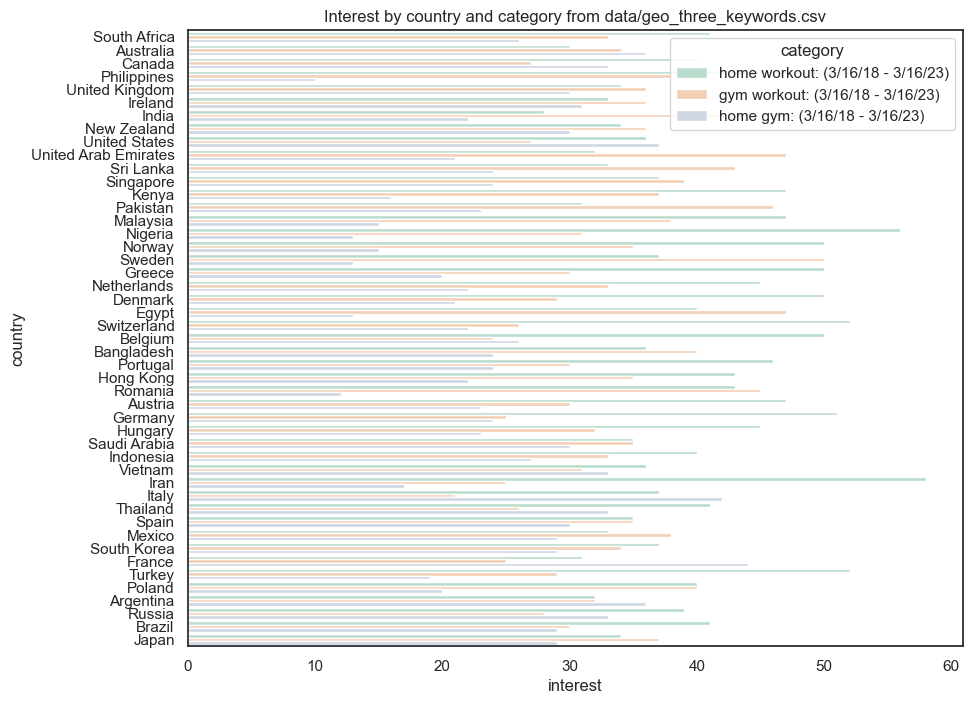

Workout DataFrame:
        week                region  interest
0 2018-03-18  workout: (Worldwide)      59.0
1 2018-03-25  workout: (Worldwide)      58.0
2 2018-04-01  workout: (Worldwide)      61.0
3 2018-04-08  workout: (Worldwide)      57.0
4 2018-04-15  workout: (Worldwide)      59.0

Three Keywords DataFrame:
        week                     region  interest
0 2018-03-18  home workout: (Worldwide)      12.0
1 2018-03-18   gym workout: (Worldwide)      16.0
2 2018-03-18      home gym: (Worldwide)      10.0
3 2018-03-25  home workout: (Worldwide)      13.0
4 2018-03-25   gym workout: (Worldwide)      17.0

Workout Global DataFrame:
          country  interest
5   United States     100.0
12         Canada      86.0
18      Australia      77.0
22    New Zealand      73.0
23        Lebanon      73.0

Geo Categories DataFrame:
        country                           category  interest
0  South Africa  home workout: (3/16/18 - 3/16/23)        41
1  South Africa   gym workout: (3/16/18 

In [3]:
# Set the style for the plots
sns.set(style='white', palette='Pastel2')

def read_file(filepath, plot=True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'.
    Generate a line plot using Seaborn to visualize the data if plot=True.
    """
    try:
        file = pd.read_csv(filepath, header=1)
        df = file.set_index('Week').stack().reset_index()
        df.columns = ['week', 'region', 'interest']
        df['week'] = pd.to_datetime(df['week'])
        df = df[df['interest'] != "<1"]
        df['interest'] = df['interest'].astype(float)

        if plot:
            plt.figure(figsize=(8, 3))
            sns.lineplot(data=df, x='week', y='interest', hue='region')
            plt.title(f"Interest over time from {filepath}")
            plt.show()

        return df[['week', 'region', 'interest']]
    except FileNotFoundError:
        print(f"Error: File {filepath} not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

def read_geo(filepath, multi=False, plot=True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame. If multi=True, process multiple keywords.
    Generate a bar plot using Seaborn to visualize the data if plot=True.
    """
    try:
        file = pd.read_csv(filepath, header=1)

        if not multi:
            file.columns = ['country', 'interest']
            file['interest'] = file['interest'].astype(float)
            if plot:
                plt.figure(figsize=(8, 4))
                sns.barplot(data=file.dropna().iloc[:25, :], y='country', x='interest')
                plt.title(f"Interest by country from {filepath}")
                plt.show()

            return file[['country', 'interest']].dropna()

        if multi:
            file = file.set_index('Country').stack().reset_index()
            file.columns = ['country', 'category', 'interest']
            file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
            if plot:
                plt.figure(figsize=(10, 8))
                sns.barplot(data=file.dropna(), y='country', x='interest', hue='category')
                plt.title(f"Interest by country and category from {filepath}")
                plt.show()

            return file[['country', 'category', 'interest']].dropna()
    except FileNotFoundError:
        print(f"Error: File {filepath} not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

# Load and process datasets
workout_df = read_file("data/workout.csv")
three_keywords_df = read_file("data/three_keywords.csv")
workout_global_df = read_geo("data/workout_global.csv")
geo_categories_df = read_geo("data/geo_three_keywords.csv", multi=True)

# Display the first few rows of each DataFrame after cleaning
print("Workout DataFrame:")
print(workout_df.head())

print("\nThree Keywords DataFrame:")
print(three_keywords_df.head())

print("\nWorkout Global DataFrame:")
print(workout_global_df.head())

print("\nGeo Categories DataFrame:")
print(geo_categories_df.head())

# Display basic statistics for each DataFrame
print("\nWorkout DataFrame Statistics:")
print(workout_df.describe())

print("\nThree Keywords DataFrame Statistics:")
print(three_keywords_df.describe())

print("\nWorkout Global DataFrame Statistics:")
print(workout_global_df.describe())

print("\nGeo Categories DataFrame Statistics:")
print(geo_categories_df.describe())

In [4]:
# Check if any missing values exist
print(workout_df.isnull().sum())
print(three_keywords_df.isnull().sum())
print(workout_global_df.isnull().sum())
print(geo_categories_df.isnull().sum())

week        0
region      0
interest    0
dtype: int64
week        0
region      0
interest    0
dtype: int64
country     0
interest    0
dtype: int64
country     0
category    0
interest    0
dtype: int64


In [5]:
# Check if there are any duplicates
print(workout_df.duplicated().sum())
print(three_keywords_df.duplicated().sum())
print(workout_global_df.duplicated().sum())
print(geo_categories_df.duplicated().sum())

0
0
0
0


In [6]:
# Check if the data types of each column are correct
print(workout_df.dtypes)
print(three_keywords_df.dtypes)
print(workout_global_df.dtypes)
print(geo_categories_df.dtypes)

week        datetime64[ns]
region              object
interest           float64
dtype: object
week        datetime64[ns]
region              object
interest           float64
dtype: object
country      object
interest    float64
dtype: object
country     object
category    object
interest     int64
dtype: object


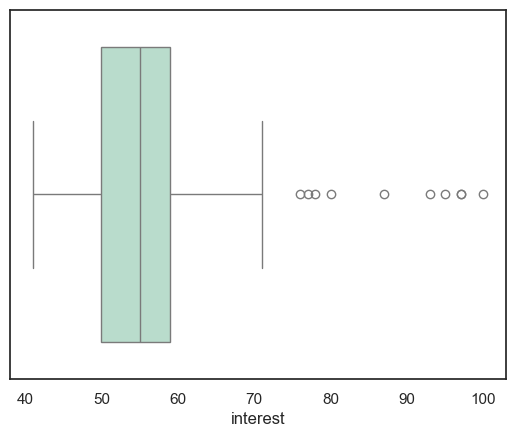

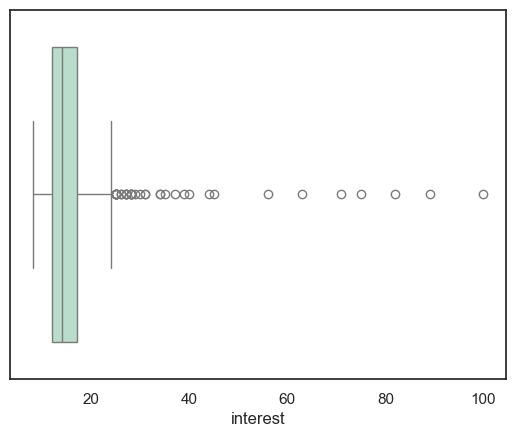

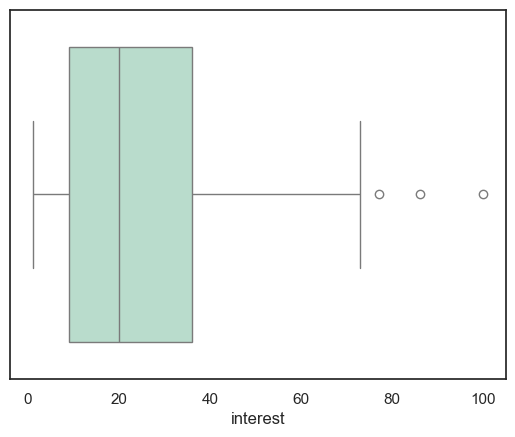

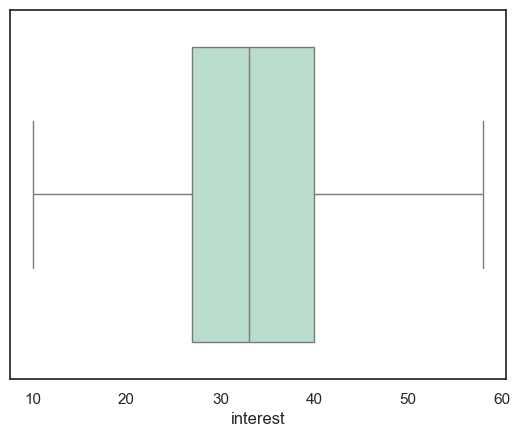

In [7]:
# Check for outliers with boxplots
sns.boxplot(x=workout_df['interest'])
plt.show()
sns.boxplot(x=three_keywords_df['interest'])
plt.show()
sns.boxplot(x=workout_global_df['interest'])
plt.show()
sns.boxplot(x=geo_categories_df['interest'])
plt.show()

In [8]:
# function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [9]:
# Remove outliers
workout_df = remove_outliers(workout_df, 'interest')
three_keywords_df = remove_outliers(three_keywords_df, 'interest')
workout_global_df = remove_outliers(workout_global_df, 'interest')
geo_categories_df = remove_outliers(geo_categories_df, 'interest')

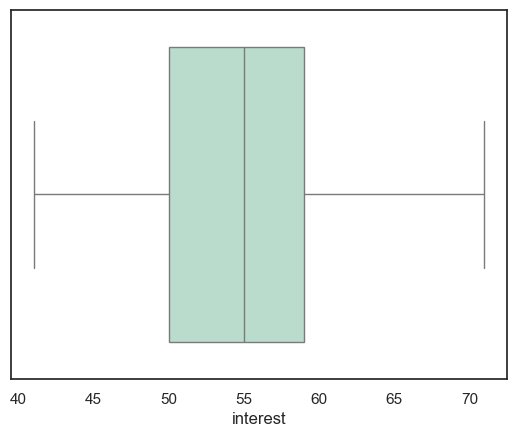

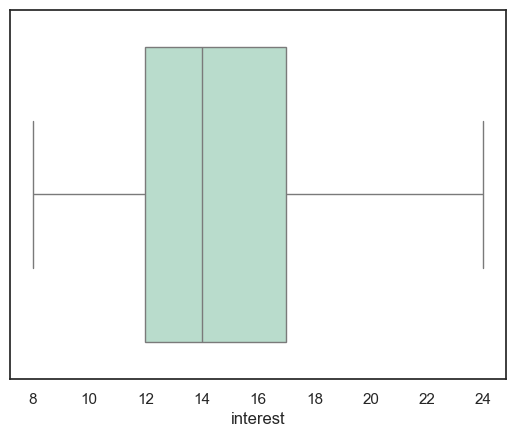

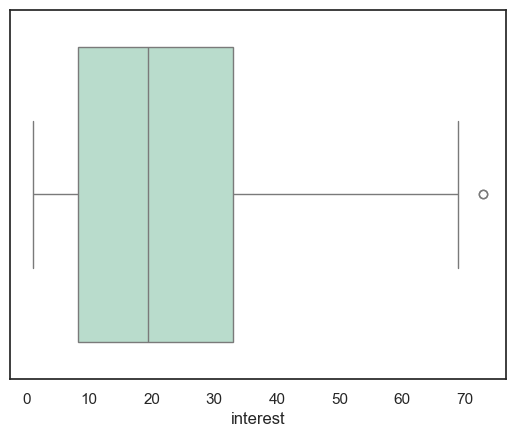

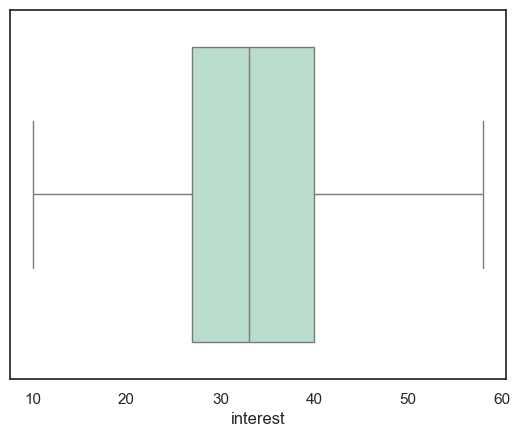

In [10]:
# Check for outliers again
sns.boxplot(x=workout_df['interest'])
plt.show()
sns.boxplot(x=three_keywords_df['interest'])
plt.show()
sns.boxplot(x=workout_global_df['interest'])
plt.show()
sns.boxplot(x=geo_categories_df['interest'])
plt.show()

In [11]:
# Function to read and process data files
def read_file(filepath, plot=True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'.
    Generate a line plot using Seaborn to visualize the data if plot=True.
    """
    try:
        file = pd.read_csv(filepath, header=1)
        df = file.set_index('Week').stack().reset_index()
        df.columns = ['week', 'region', 'interest']
        df['week'] = pd.to_datetime(df['week'])
        df = df[df['interest'] != "<1"]
        df['interest'] = df['interest'].astype(float)

        if plot:
            plt.figure(figsize=(8, 3))
            sns.lineplot(data=df, x='week', y='interest', hue='region')
            plt.title(f"Interest over time from {filepath}")
            plt.show()

        return df[['week', 'region', 'interest']]
    except FileNotFoundError:
        print(f"Error: File {filepath} not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

# Function to read and process geographical data files
def read_geo(filepath, multi=False, plot=True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame. If multi=True, process multiple keywords.
    Generate a bar plot using Seaborn to visualize the data if plot=True.
    """
    try:
        file = pd.read_csv(filepath, header=1)

        if not multi:
            file.columns = ['country', 'interest']
            file['interest'] = file['interest'].astype(float)
            if plot:
                plt.figure(figsize=(8, 4))
                sns.barplot(data=file.dropna().iloc[:25, :], y='country', x='interest')
                plt.title(f"Interest by country from {filepath}")
                plt.show()

            return file[['country', 'interest']].dropna()

        if multi:
            file = file.set_index('Country').stack().reset_index()
            file.columns = ['country', 'category', 'interest']
            file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
            if plot:
                plt.figure(figsize=(10, 8))
                sns.barplot(data=file.dropna(), y='country', x='interest', hue='category')
                plt.title(f"Interest by country and category from {filepath}")
                plt.show()

            return file[['country', 'category', 'interest']].dropna()
    except FileNotFoundError:
        print(f"Error: File {filepath} not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

In [12]:
# Save cleaned data to CSV files
workout_df.to_csv("data/workout_clean.csv", index=False)
three_keywords_df.to_csv("data/three_keywords_clean.csv", index=False)
workout_global_df.to_csv("data/workout_global_clean.csv", index=False)
geo_categories_df.to_csv("data/geo_three_keywords_clean.csv", index=False)